# Observe NGC 1052 with the VLA

In [50]:
import astroplan
from astroplan.plots import plot_altitude
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.time import Time
from astropy import coordinates
from astropy import units as u
import seaborn as sns

In [10]:
coordinates.EarthLocation.get_site_names()

['',
 '',
 '',
 'ALMA',
 'ATST',
 'Anglo-Australian Observatory',
 'Apache Point',
 'Apache Point Observatory',
 'Atacama Large Millimeter Array',
 'BAO',
 'BBSO',
 'Beijing XingLong Observatory',
 'Black Moshannon Observatory',
 'CHARA',
 'Canada-France-Hawaii Telescope',
 'Catalina Observatory',
 'Cerro Pachon',
 'Cerro Paranal',
 'Cerro Tololo',
 'Cerro Tololo Interamerican Observatory',
 'DCT',
 'DKIST',
 'Discovery Channel Telescope',
 'Dominion Astrophysical Observatory',
 'GBT',
 'Gemini South',
 'Green Bank Telescope',
 'Hale Telescope',
 'Haleakala Observatories',
 'Happy Jack',
 'IAO',
 'JCMT',
 'James Clerk Maxwell Telescope',
 'Jansky Very Large Array',
 'Keck Observatory',
 'Kitt Peak',
 'Kitt Peak National Observatory',
 'La Silla Observatory',
 'Large Binocular Telescope',
 'Las Campanas Observatory',
 'Lick Observatory',
 'Lowell Observatory',
 'MWA',
 'Manastash Ridge Observatory',
 'McDonald Observatory',
 'Medicina',
 'Medicina Dish',
 'Michigan-Dartmouth-MIT Observa

There are a few telescopes missing: ATCA, ASKAP, IRAM 30m dish, Plateau de Burre (NOEMA)

In [ ]:
col = '#{:02X}{:02X}{:02X}'.format(int(mpl.cm.hsv(0.9)[0] * 255), 
                                   int(mpl.cm.hsv(0.9)[1] * 255),
                                   int(mpl.cm.hsv(0.9)[2] * 255))

In [11]:
vla = astroplan.Observer.at_site('vla')

In [54]:
time = Time('2020-09-13 12:00:00')
time_range = Time(["2020-09-01T00:00:00", "2020-10-01T00:00:00"])
observe_time = time + np.linspace(-240, 240, 4800)*u.hour
sun_coord = coordinates.get_sun(time)
moon_coord = coordinates.get_moon(time)
n1052 = astroplan.FixedTarget.from_name('NGC1052')
sun = astroplan.FixedTarget(name='Sun', coord=sun_coord)
moon = astroplan.FixedTarget(name='Moon', coord=moon_coord)

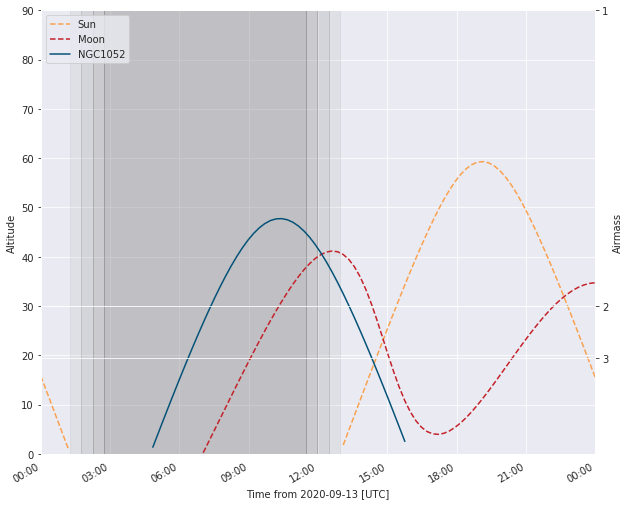

In [57]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(10.0, 8.0))
ax = fig.add_axes([0.17, 0.17, 0.77, 0.77])
plot_altitude(sun, vla, time, ax=ax, style_kwargs={'color':'#faa14f', 
                                                   'linestyle':'--'})
plot_altitude(moon, vla, time, ax=ax, style_kwargs={'color':'#C42129', 
                                                   'linestyle':'--'})
plot_altitude(n1052, vla, time, ax=ax, style_kwargs={'color':'#045277'}, 
              brightness_shading=True, airmass_yaxis=True)
ax.legend(loc=2)

In [68]:
print(vla.altaz(observe_time, n1052).alt.value)
print(vla.moon_altaz(observe_time).alt.value)

[45.44427782 44.97086194 44.45779003 ... 38.20051525 37.36450291
 36.50396285]
[ 21.69067678  20.59889888  19.49843289 ... -75.87766982 -76.66465431
 -77.37855153]


In [ ]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(10.0, 8.0))
ax = fig.add_axes([0.17, 0.17, 0.77, 0.77])
plot_altitude(sun, vla, observe_time, ax=ax, style_kwargs={'color':'#faa14f', 
                                                   'linestyle':'--'})
# plot_altitude(moon, vla, observe_time, ax=ax, style_kwargs={'color':'#C42129', 
#                                                    'linestyle':'--'})
plot_altitude(n1052, vla, observe_time, ax=ax, style_kwargs={'color':'#045277'}, 
              brightness_shading=True, airmass_yaxis=True)
ax.plot(observe_time, vla.moon_altaz(observe_time).alt)
ax.legend(loc=2)